In [1]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt 
import keras
from sklearn import datasets
from keras.datasets import mnist
from keras.models import Sequential
from keras.models import Model
from tensorflow.keras import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dense
from keras.layers.core import Dense
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam  
from tensorflow.keras.layers import Flatten
import keras.utils
from keras import utils as np_utils
from keras.utils.np_utils import to_categorical
import random

In [2]:
np.random.seed()

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape)
print(X_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [5]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28, 28)), "The dimensions of the images are not 28x28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28, 28)), "The dimensions of the images are not 28x28"




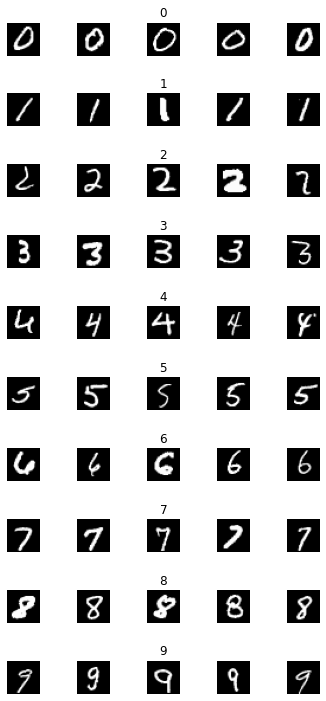

In [6]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected - 1)), :, :], cmap = plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
           axs[j][i].set_title(str(j))
           num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

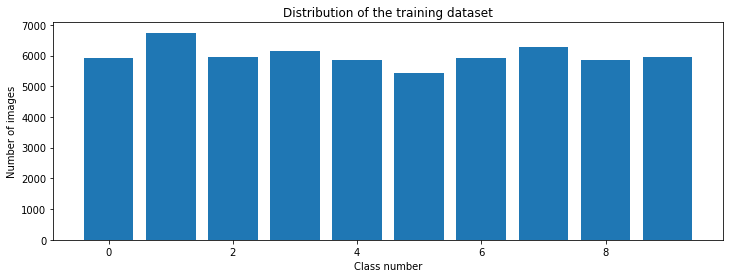

In [7]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [8]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)


In [9]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
#define the leNet model function
def leNet_model():
  model = keras.models.Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(15, (3, 3), activation ='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(500, activation ='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation = 'softmax'))
  model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

  return model




In [12]:

model = leNet_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 375)               0         
                                                                 
 dense (Dense)               (None, 500)               1

Epoch 1/10
135/135 [==============================] - 14s 14ms/step - loss: 0.2604 - accuracy: 0.9155 - val_loss: 0.0530 - val_accuracy: 0.9840
Epoch 2/10
135/135 [==============================] - 1s 9ms/step - loss: 0.0764 - accuracy: 0.9768 - val_loss: 0.0508 - val_accuracy: 0.9848
Epoch 3/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0593 - accuracy: 0.9811 - val_loss: 0.0378 - val_accuracy: 0.9887
Epoch 4/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0525 - accuracy: 0.9841 - val_loss: 0.0554 - val_accuracy: 0.9833
Epoch 5/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0521 - accuracy: 0.9840 - val_loss: 0.0412 - val_accuracy: 0.9885
Epoch 6/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0478 - accuracy: 0.9851 - val_loss: 0.0364 - val_accuracy: 0.9905
Epoch 7/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0404 - accuracy: 0.9874 - val_loss: 0.0433 - val_accuracy: 0.9872
Epoc

Text(0.5, 0, 'epoch')

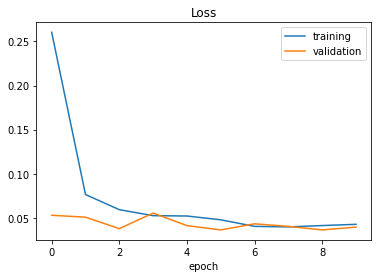

In [13]:
history=model.fit(X_train, y_train, epochs=10,  validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')
 


Text(0.5, 0, 'epoch')

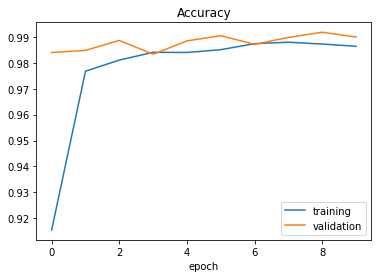

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

Test score: 0.04330788925290108
Test accuracy: 0.987500011920929


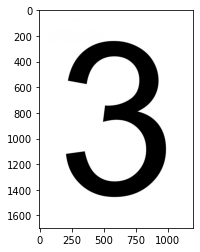

In [15]:
score = model.evaluate(X_test, y_test, verbose=0)
 
print('Test score:', score[0])
print('Test accuracy:', score[1])

#predict internet number

import requests
from PIL import Image
url = 'https://printables.space/files/uploads/download-and-print/large-printable-numbers/3-a4-1200x1697.jpg'
 
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 


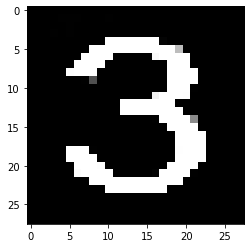

In [16]:
import cv2
 
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 


In [17]:
img = img/255
img = img.reshape(1,28,28,1)
print(img.shape)
 
print(img.shape)
print("predicted digit: "+str(np.argmax(model.predict(img), axis=-1)))

 


(1, 28, 28, 1)
(1, 28, 28, 1)
predicted digit: [3]


In [18]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

layer1.predict(img), layer2.predict(img)
visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)
print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


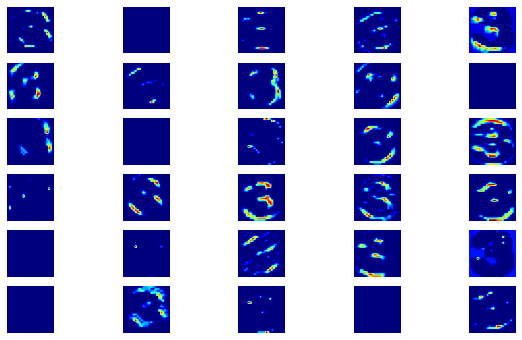

In [19]:
plt.figure(figsize = (10,6))
for i in range (30):
  plt.subplot(6, 5, i+1)
  plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
  plt.axis('off')


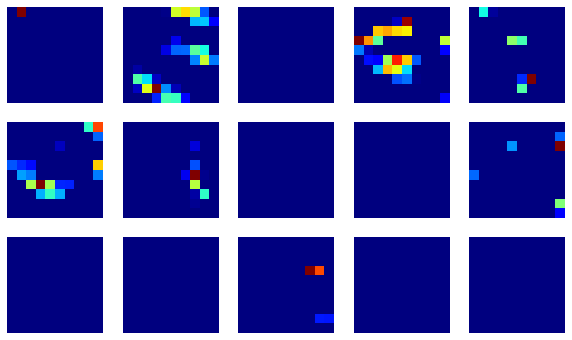

In [20]:
plt.figure(figsize = (10,6))
for i in range (15):
  plt.subplot(3, 5, i+1)
  plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
  plt.axis('off')